In [1]:
import torch
import sys
import esm

In [2]:
model_data  = torch.load('./pretrained_model/esm1_t6_43M_UR50S.pt', map_location="cpu")
model,alphabet = esm.pretrained.load_model_and_alphabet_core(model_data, None)
batch_converter = alphabet.get_batch_converter()

/data/zhangruochi/projects/pseudoESM/esm/pretrained.py:174: UserWarning: Regression weights not found, predicting contacts will not produce correct results.
  warnings.warn(


In [4]:
# for id,layer in enumerate(model.layers):
#     print('{},***{}'.format(id,layer))

In [6]:
model.eval()  # disables dropout for deterministic results

# Prepare data (first 2 sequences from ESMStructuralSplitDataset superfamily / 4)
data = [
    ("protein1", "MKTVRQERLKSIVRILERSKEPVSGAQLAEELSVSRQVIVQDIAYLRSLGYNIVATPRGYVLAGG"),
    ("protein2", "KALTARQQEVFDLIRDHISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"),
    ("protein2 with mask","KALTARQQEVFDLIRD<mask>ISQTGMPPTRAEIAQRLGFRSPNAAEEHLKALARKGVIEIVSGASRGIRLLQEE"),
    ("protein3",  "K A <mask> I S Q"),
]

batch_labels, batch_strs, batch_tokens = batch_converter(data)

# Extract per-residue representations (on CPU)
with torch.no_grad():
    results = model(batch_tokens, repr_layers=[6], return_contacts=True)

In [20]:
results.keys()

dict_keys(['logits', 'representations', 'attentions', 'contacts'])

In [22]:
results["contacts"].shape, results["representations"][6].shape, results[
    "logits"].shape, results["attentions"].shape


(torch.Size([4, 71, 71]),
 torch.Size([4, 72, 768]),
 torch.Size([4, 72, 35]),
 torch.Size([4, 6, 12, 72, 72]))

In [4]:
lens = []
with open("/data/zhangruochi/projects/pseudoESM/data/train/2million.fasta") as f:
    for i, line in enumerate(f):
        if i % 2 != 0:
            lens.append(len(line)) 

In [5]:
from matplotlib import pyplot as plt

(array([3.74039e+05, 5.79481e+05, 2.50362e+05, 1.60281e+05, 1.27154e+05,
        8.98170e+04, 7.17820e+04, 5.24230e+04, 4.42960e+04, 3.47120e+04,
        3.08210e+04, 2.41840e+04, 2.22380e+04, 1.79080e+04, 1.60930e+04,
        1.26140e+04, 1.18700e+04, 9.81000e+03, 8.92100e+03, 7.32900e+03,
        6.57200e+03, 5.35400e+03, 4.80200e+03, 3.89100e+03, 3.25300e+03,
        3.09000e+03, 2.60500e+03, 2.35800e+03, 1.99000e+03, 1.85800e+03,
        1.52700e+03, 1.48600e+03, 1.28600e+03, 1.14100e+03, 1.04900e+03,
        9.62000e+02, 8.57000e+02, 8.41000e+02, 6.79000e+02, 6.57000e+02,
        5.90000e+02, 5.70000e+02, 5.06000e+02, 4.46000e+02, 4.04000e+02,
        3.81000e+02, 3.19000e+02, 3.11000e+02, 2.80000e+02, 3.01000e+02,
        2.72000e+02, 2.38000e+02, 2.22000e+02, 2.04000e+02, 1.87000e+02,
        1.84000e+02, 1.82000e+02, 1.35000e+02, 1.15000e+02, 1.08000e+02,
        1.13000e+02, 9.80000e+01, 7.20000e+01, 8.50000e+01, 9.90000e+01,
        7.40000e+01, 8.10000e+01, 7.20000e+01, 8.40

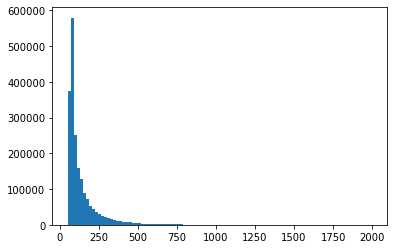

In [7]:
plt.hist(lens,bins = 100)